In [819]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.optim as optim
from torch.autograd import Variable
import numpy.random as rand
import numpy as np
import sys
import os
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from sklearn.metrics import fbeta_score


from bnn import BNNBayesbyBackprop, gauss_logpdf
os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/Users/d_berman/Documents/Tufts_Masters/Semester_3/Bayesian Deep Learning/BDL_final_project'

## Toy dataset for regression

In [762]:
W = np.array([-10, 10]).reshape(-1, 1)
b = -5
X_train = np.random.uniform(-10,10, (5000, 2))
X_train[:,0] = 0.0
X_train.shape
W.T.shape

eps = 0.0001
W_s = np.array([0.0, 0.3]).reshape(-1, 1)
print(W_s)
b_s = 0.1

print(b_s)

y_train = np.zeros((X_train.shape[0], 1), dtype=float)
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  y_train[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))



print(y_train)

[[0. ]
 [0.3]]
0.1
[[ 45.82018044]
 [ 11.11175376]
 [-41.48771775]
 ...
 [ 99.67947662]
 [-19.86093476]
 [ 13.68647673]]


(array([646., 635., 651., 657., 633., 703., 655., 337.,  77.,   6.]),
 array([-105.03859583,  -78.97820991,  -52.917824  ,  -26.85743808,
          -0.79705216,   25.26333376,   51.32371968,   77.38410559,
         103.44449151,  129.50487743,  155.56526335]),
 <a list of 10 Patch objects>)

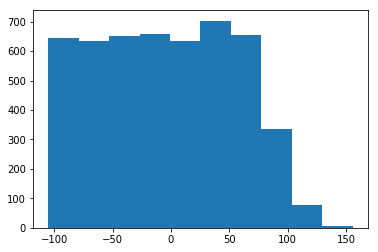

In [763]:
plt.hist(y_train)
# np.exp(10 * 0.01)

compare likelihood of test set given true mean and true variance and true variance + bias

In [4]:
tst = np.empty_like(X_train[:,0])
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  tst[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
tst

print(gauss_logpdf(tst, X_train @ W + b, np.exp(x @ W_s + b_s)).sum())
print(gauss_logpdf(tst, X_train @ W + b, np.exp(x @ W_s + b_s) + 100).sum())

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

Toy dataset for classification 2d

In [825]:
dataset_size = 5000

X_train = np.empty(shape=(dataset_size, 2), dtype=float)
y_train = np.empty(shape=(dataset_size,), dtype=float)

# make first dimension 0 to effectively make it univariate 
# bc current bnn arch only works with multivariate input
# X_train[:int(dataset_size/2),0] = np.random.normal(loc=0,
#                                                    scale=1,
#                                                    size=(int(dataset_size/2),))
# X_train[:int(dataset_size/2), 1] = np.random.normal(loc=0, 
#                                                     scale=1, 
#                                                     size=(int(dataset_size/2),))

scale = 1

X_train[:int(dataset_size/2), 0] = np.random.uniform(2 * scale, 12 * scale, 
                                                    size=(int(dataset_size/2),))
X_train[:int(dataset_size/2), 1] = np.random.uniform(7.5* scale, 13.5 * scale,
                                                   size=(int(dataset_size/2),))


y_train[:int(dataset_size/2)] = 0

X_train[int(dataset_size/2):,0] = np.random.uniform(2 * scale, 12 * scale,
                                                   size=(int(dataset_size/2),))
X_train[int(dataset_size/2):, 1] = np.random.uniform(0.5 * scale, 6.5 * scale,
                                                    size=(int(dataset_size/2),))
y_train[int(dataset_size/2):] = 1

# shuffle order
perm = np.random.permutation(dataset_size)
X_train = X_train[perm]
y_train = y_train[perm]

In [826]:
A = np.array([[1, 1],
              [1, 0]])
X_train = X_train @ A

/anaconda3/envs/Pytorch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


sklearn logistic regression accuracy is: 1.0


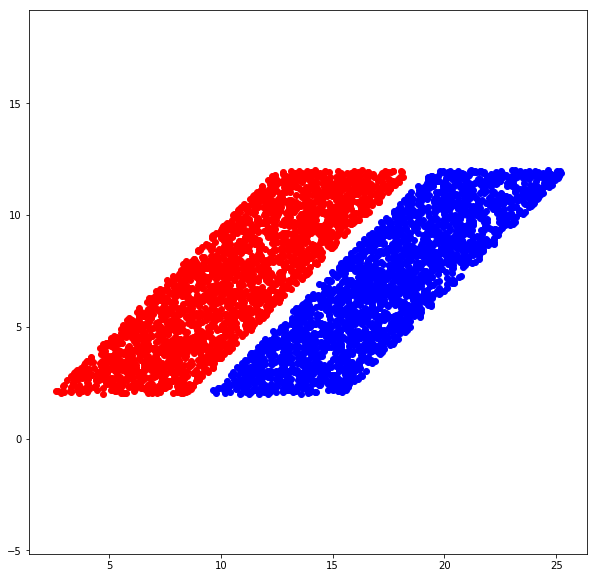

In [827]:
def plane(x1, x2, w1, b):
    return w1[0] * x1 + w1[1] * x2 + b
    

w1 = np.array([[0,0]]).T
w2 = np.array([[0,0]]).T
W_full = np.hstack((w1, w2))
b = 0

x = y = np.arange(-8.0, 8.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = plane(X, Y, w1, b)
# print("X shape", zs.shape)

# Z = zs.reshape(X.shape)

# ax.plot_surface(X, Y, Z)

# x_line = np.random.uniform(-8, 8, (100, 2))
#  = 
# print(w1.T.shape)
# y = w1.T @ x + b
# y = y.flatten()
# plt.plot(x1, x2)
# plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='red', alpha=0.2)
# plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='blue', alpha=0.2)
# plt.ylim((-10, 10))


fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(311, projection='3d')       
ax = fig.add_subplot(111)   

# ax.plot_wireframe(X, Y, zs, color='grey', alpha = 0.7)
ax.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='blue')
ax.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='red')
ax.axis('equal')
# ax.set_ylim(-6, 6)
fig.show()
# print("------")                                                        
# print(x_line[:,0].shape)                                                   
# print(x_line[:,1].shape)                                                   
# print(y.shape)                                                        
# print("------")


# ax.scatter(X1_train_grd, X2_train_grd, alpha=0.5)

# ax.plot()
# ax.set_xlabel('X_train[:,0]')                                          
# ax.set_ylabel('X_train[:,1]')                                          
# ax.set_zlabel('output[:,1] (Standard Deviation)')                      
# fig.show()
# plt.show()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('sklearn logistic regression accuracy is:', lr.score(X_train, y_train))

In [828]:
np.log(0.1)

-2.3025850929940455

In [829]:
for i, row_i in enumerate(X_train):
    X_train[i, 1] = X_train[i, 1] + np.random.normal(loc=0, scale= np.exp(0.08 * X_train[i, 0]))

/anaconda3/envs/Pytorch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/Pytorch/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


sklearn logistic regression accuracy is: 0.892


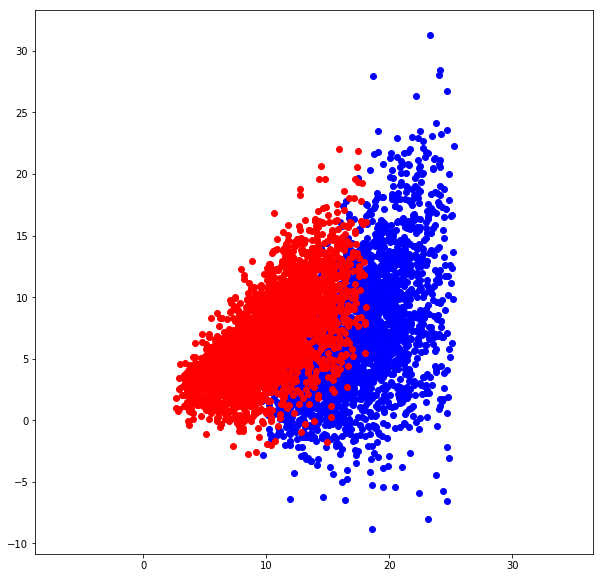

In [830]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('sklearn logistic regression accuracy is:', lr.score(X_train, y_train))

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(311, projection='3d')       
ax = fig.add_subplot(111)   

# ax.plot_wireframe(X, Y, zs, color='grey', alpha = 0.7)
ax.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='blue')
ax.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='red')
ax.axis('equal')
# ax.set_ylim(-6, 6)
fig.show()

/anaconda3/envs/Pytorch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/Pytorch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/Pytorch/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


sklearn logistic regression accuracy is: 1.0
sklearn logistic regression accuracy is: 0.8948


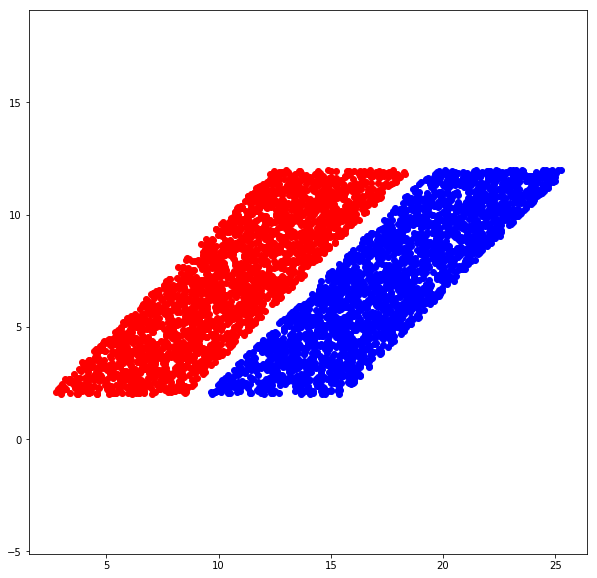

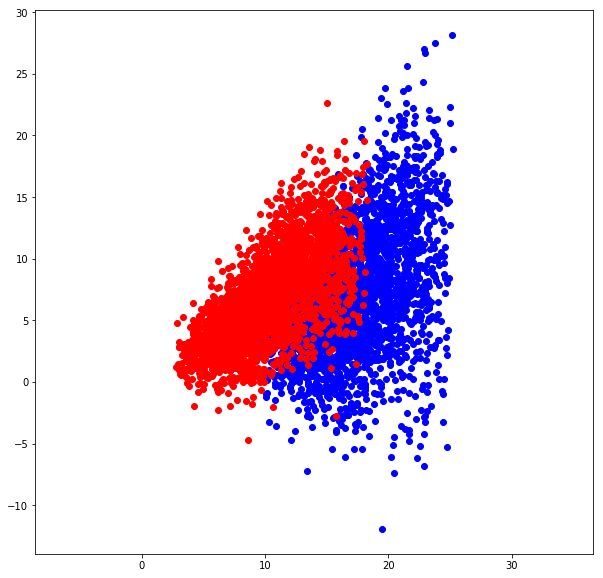

In [824]:
dataset_size = 5000

X_test = np.empty(shape=(dataset_size, 2), dtype=float)
y_test = np.empty(shape=(dataset_size,), dtype=float)

# make first dimension 0 to effectively make it univariate 
# bc current bnn arch only works with multivariate input
# X_test[:int(dataset_size/2),0] = np.random.normal(loc=0,
#                                                    scale=1,
#                                                    size=(int(dataset_size/2),))
# X_test[:int(dataset_size/2), 1] = np.random.normal(loc=0, 
#                                                     scale=1, 
#                                                     size=(int(dataset_size/2),))

scale = 1

X_test[:int(dataset_size/2), 0] = np.random.uniform(2 * scale, 12 * scale, 
                                                    size=(int(dataset_size/2),))
X_test[:int(dataset_size/2), 1] = np.random.uniform(7.5* scale, 13.5 * scale,
                                                   size=(int(dataset_size/2),))


y_test[:int(dataset_size/2)] = 0

X_test[int(dataset_size/2):,0] = np.random.uniform(2 * scale, 12 * scale,
                                                   size=(int(dataset_size/2),))
X_test[int(dataset_size/2):, 1] = np.random.uniform(0.5 * scale, 6.5 * scale,
                                                    size=(int(dataset_size/2),))
y_test[int(dataset_size/2):] = 1

# shuffle order
perm = np.random.permutation(dataset_size)
X_test = X_test[perm]
y_test = y_test[perm]

A = np.array([[1, 1],
              [1, 0]])
X_test = X_test @ A

def plane(x1, x2, w1, b):
    return w1[0] * x1 + w1[1] * x2 + b
    

w1 = np.array([[0,0]]).T
w2 = np.array([[0,0]]).T
W_full = np.hstack((w1, w2))
b = 0

x = y = np.arange(-8.0, 8.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = plane(X, Y, w1, b)
# print("X shape", zs.shape)

# Z = zs.reshape(X.shape)

# ax.plot_surface(X, Y, Z)

# x_line = np.random.uniform(-8, 8, (100, 2))
#  = 
# print(w1.T.shape)
# y = w1.T @ x + b
# y = y.flatten()
# plt.plot(x1, x2)
# plt.scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], c='red', alpha=0.2)
# plt.scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], c='blue', alpha=0.2)
# plt.ylim((-10, 10))


fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(311, projection='3d')       
ax = fig.add_subplot(111)   

# ax.plot_wireframe(X, Y, zs, color='grey', alpha = 0.7)
ax.scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], c='blue')
ax.scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], c='red')
ax.axis('equal')
# ax.set_ylim(-6, 6)
fig.show()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_test, y_test)
print('sklearn logistic regression accuracy is:', lr.score(X_test, y_test))

for i, row_i in enumerate(X_test):
    X_test[i, 1] = X_test[i, 1] + np.random.normal(loc=0, scale= np.exp(0.08 * X_test[i, 0]))
    
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_test, y_test)
print('sklearn logistic regression accuracy is:', lr.score(X_test, y_test))

fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(311, projection='3d')       
ax = fig.add_subplot(111)   

# ax.plot_wireframe(X, Y, zs, color='grey', alpha = 0.7)
ax.scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], c='blue')
ax.scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], c='red')
ax.axis('equal')
# ax.set_ylim(-6, 6)
fig.show()

plt.savefig("toy_classification.png")

Toy dataset for classification 1d

In [60]:
dataset_size = 5000

X_train = np.empty(shape=(dataset_size, 2), dtype=float)
y_train = np.empty(shape=(dataset_size,), dtype=float)

# make first dimension 0 to effectively make it univariate 
# bc current bnn arch only works with multivariate input
X_train[:int(dataset_size/2), 0] = 0
X_train[:int(dataset_size/2), 1] = np.random.normal(loc=2,
                                                 scale=1,
                                                 size=(int(dataset_size/2),))
y_train[:int(dataset_size/2)] = 0



X_train[int(dataset_size/2):, 0] = 0
X_train[int(dataset_size/2):, 1] = np.random.normal(loc=10,
                                                   scale=1,
                                                   size=(int(dataset_size/2),))
y_train[int(dataset_size/2):] = 1

# shuffle order
perm = np.random.permutation(dataset_size)
X_train = X_train[perm]
y_train = y_train[perm]

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

/anaconda3/envs/Pytorch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

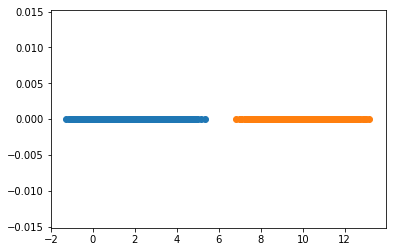

In [62]:
# a separating line!
# x1 = np.linspace(-2, 14, 20)
# y = x1 * 1 - 8.5

plt.scatter(X_train[y_train == 0, 1], [0]*int(X_train.shape[0]/2))
plt.scatter(X_train[y_train == 1, 1], [0]*int(X_train.shape[0]/2))
# plt.plot(x1, y)

In [ ]:
# W_full
# W
# preset_preds.shape
# print('MAE of BNN with q mean == true weights: ', np.mean(np.abs(preset_preds - y_train.flatten())))
# print('acc of BNN with q mean == true weights: ', np.mean((preset_preds == y_train.flatten()).astype(int)))
# print('\n')
# print(preset_preds[1], y_train[1])
# bnn_preset.model.l1.W_log_s_DO
# bnn_preset.model.l1.b_log_s_O
# bnn_preset.MC_elbo(torch.Tensor(X_train), torch.Tensor(y_train), 9, 10, 100).detach().numpy()

# plt.title("line with {} as slope".format(w))
# plt.plot(x1, x2)
# plt.scatter(X_train1[y_train1 == 0,0], X_train1[y_train1 == 0,1], c='red', alpha=0.2)
# plt.scatter(X_train1[y_train1 == 1,0], X_train1[y_train1 == 1,1], c='blue', alpha=0.2)
# plt.ylim((-10, 10))

# ax = fig.add_subplot(311, projection='3d')                             
# print("------")                                                        
# print(x1[:,0].shape)                                                   
# print(x1[:,1].shape)                                                   
# print(y1.shape)                                                        
# print("------")                                                        
# ax.plot_surface(x1[0,1], x1[:,1], y1)                                       
# ax.set_xlabel('X_train[:,0]')                                          
# ax.set_ylabel('X_train[:,1]')                                          
# ax.set_zlabel('output[:,1] (Standard Deviation)')                      
# fig.show()
# plt.show()



## test ELBO as slope of line changes

[[0. 0.]
 [1. 0.]]
[[0.]
 [1.]]
X_int 21.162403

used_b is -20.054132
used_w is  0.94763017

grads w1  tensor([-6.7961e-03, -6.9137e+03])
grad b  tensor(-695.3595)
Accuracy with -20 as bias:  50.0 %
likelihood -38209.665
X_int 20.216524

used_b is -18.58039
used_w is  0.9190695

grads w1  tensor([ 3.0592e-03, -1.0214e+04])
grad b  tensor(-1023.5146)
Accuracy with -19 as bias:  50.0 %
likelihood -37333.1875
X_int 16.733711

used_b is -17.609013
used_w is  1.0523076

grads w1  tensor([-8.2046e-03, -1.4813e+04])
grad b  tensor(-1454.5852)
Accuracy with -18 as bias:  50.0 %
likelihood -36397.1075
X_int 16.37387

used_b is -16.843601
used_w is  1.0286878

grads w1  tensor([ 2.8262e-03, -1.7274e+04])
grad b  tensor(-1709.2228)
Accuracy with -17 as bias:  50.0 %
likelihood -34417.4125
X_int 16.305536

used_b is -16.17023
used_w is  0.99170184

grads w1  tensor([-7.5810e-03, -2.3520e+04])
grad b  tensor(-2310.4102)
Accuracy with -16 as bias:  50.0 %
likelihood -33066.4475
X_int 17.553799

used

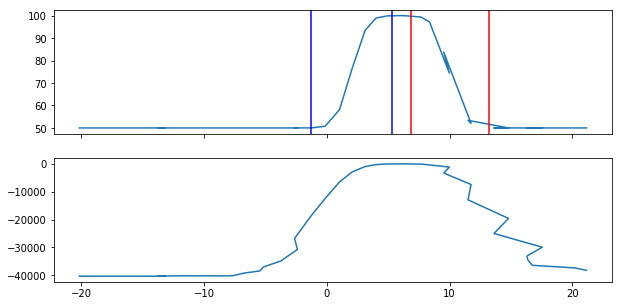

In [67]:
def plane(x1, x2, w1, b):
    return w1[0] * x1 + w1[1] * x2 + b

# for regression toy set
# W_full = np.hstack((W, W_s))
# W_full

# b_full = np.hstack((b, b_s))
# b_full[1] = 2.0

# for 3d
# w1 = np.array([[0.0,1.0]]).T
# w2 = np.array([[0.0,0.0]]).T
# W_full = np.hstack((w1, w2))

# x1 = x2 = np.arange(-8.0, 8.0, 0.05)
# X1, X2 = np.meshgrid(x, y)
# b = 0
# Z = plane(X1, X2, w1, b)


w1 = np.array([[0.0,1.0]]).T
w2 = np.array([[0.0,0.0]]).T
W_full = np.hstack((w1, w2))
print(W_full)
print(w1)
# x1 = x2 = np.arange(-8.0, 8.0, 0.05)
# X1, X2 = np.meshgrid(x, y)
# b = 0
# Z = plane(X1, X2, w1, b)
mc_samples = [i for 20 * i in range(1, 11)]
bs = [i for i in range(-20, 15)]
used_bs = []
accuracies = []
x_ints = []
likelihoods = []
grad_bs = []
for b in bs:
    b_full = np.array([b,0])
    # b_full[0], b_full[1] = 0,0
    bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                    prior_s=0.8, 
                                    linear_regression=True, 
                                    classification=True,
                                    preset={'W_mu': W_full, 'b_mu': b_full},
                                    num_MC_samples=200)
    preset_preds = bnn_preset.model.forward(torch.Tensor(X_train), predict=True).detach().numpy()
    used_b = bnn_preset.model.l1.usedBias[0].detach().numpy()
    used_w = bnn_preset.model.l1.usedWeights[:,0][1].detach().numpy()
    used_bs.append(used_b)
    
    x_intercept = -used_b / used_w
    x_ints.append(x_intercept)
    print('X_int', x_intercept)
    print('\nused_b is', used_b)
    print('used_w is ', used_w)
    
    bnn_preset.MC_elbo(torch.Tensor(X_train), torch.Tensor(y_train), 9, 10, 100).detach().numpy()
    acc = np.mean((preset_preds == y_train.flatten()).astype(int)) * 100
    accuracies.append(acc)
    print('Accuracy with {} as bias: '.format(b), acc, '%')
    
    likelihood = bnn_preset.mean_likelihood
    likelihoods.append(likelihood)
    print('likelihood', likelihood)
    
    grad_bs.append(bnn_preset.gradB)
 
fig, ax = plt.subplots(2, 1, figsize=(10,5), sharex=True)
ax[0].plot(x_ints, accuracies)
# ax[0].scatter([np.min(X_train[y_train == 0, 1]), np.max(X_train[y_train == 0, 1])], [50,50], c='blue')
ax[0].axvline(np.min(X_train[y_train == 0, 1]), c='blue')
ax[0].axvline(np.max(X_train[y_train == 0, 1]), c='blue')

ax[0].axvline(np.min(X_train[y_train == 1, 1]), c='red')
ax[0].axvline(np.max(X_train[y_train == 1, 1]), c='red')

# ax[0].scatter([np.min(X_train[y_train == 1, 1]), np.max(X_train[y_train == 1, 1])], [50,50], c='red')


ax[1].plot(x_ints, likelihoods)
print('class 0 min: ', np.min(X_train[y_train == 0, 1]))
print('class 0 max: ',np.max(X_train[y_train == 0, 1]))
print('class 1 min: ', np.min(X_train[y_train == 1, 1]))
print('class 1 max: ',np.max(X_train[y_train == 1, 1]))



In [ ]:
# nesting subplots in subplots for MC sampling model selection?

fig = plt.figure(figsize=(20, 20))
outer = gridspec.GridSpec(3, 3, wspace=0.2, hspace=0.2)

for i in range(9):
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    
    
    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
#         t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
#         t.set_ha('center')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        
fig.show()

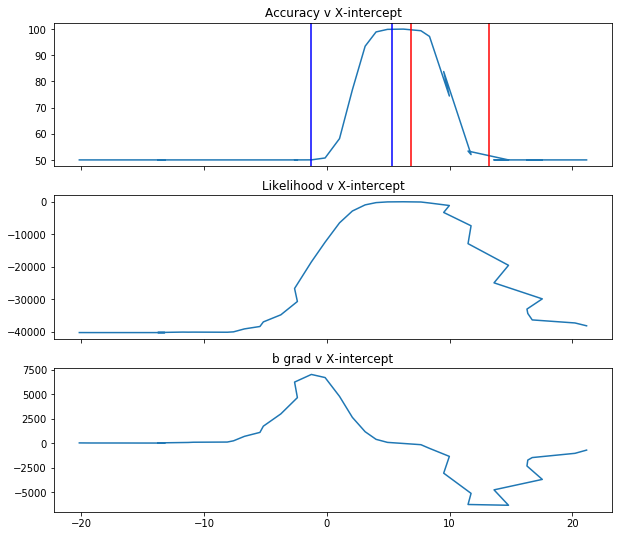

In [68]:


fig, ax = plt.subplots(3, 1, figsize=(10,9), sharex=True)
ax[0].set_title('Accuracy v X-intercept')
ax[0].plot(x_ints, accuracies)
# ax[0].scatter([np.min(X_train[y_train == 0, 1]), np.max(X_train[y_train == 0, 1])], [50,50], c='blue')
ax[0].axvline(np.min(X_train[y_train == 0, 1]), c='blue')
ax[0].axvline(np.max(X_train[y_train == 0, 1]), c='blue')

ax[0].axvline(np.min(X_train[y_train == 1, 1]), c='red')
ax[0].axvline(np.max(X_train[y_train == 1, 1]), c='red')
ax[1].set_title('Likelihood v X-intercept')
ax[1].plot(x_ints, likelihoods)

ax[2].set_title('b grad v X-intercept')
ax[2].plot(x_ints, grad_bs)

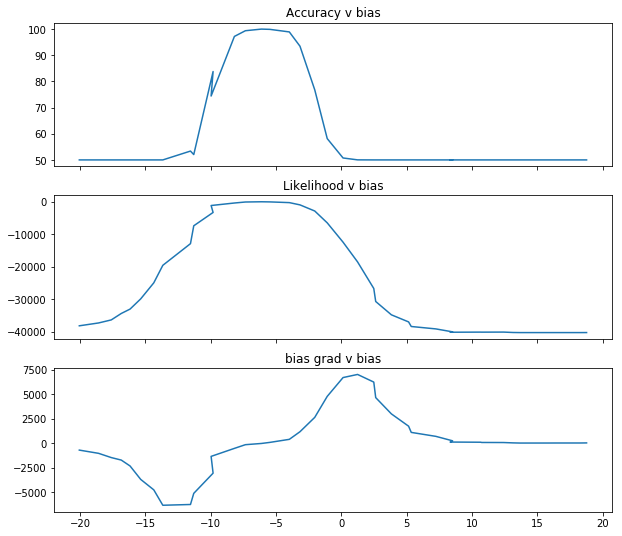

In [70]:
fig, ax = plt.subplots(3, 1, figsize=(10,9), sharex=True)
ax[0].set_title('Accuracy v bias')
ax[0].plot(used_bs, accuracies)
# ax[0].scatter([np.min(X_train[y_train == 0, 1]), np.max(X_train[y_train == 0, 1])], [50,50], c='blue')
# ax[0].axvline(np.min(X_train[y_train == 0, 1]), c='blue')
# ax[0].axvline(np.max(X_train[y_train == 0, 1]), c='blue')

# ax[0].axvline(np.min(X_train[y_train == 1, 1]), c='red')
# ax[0].axvline(np.max(X_train[y_train == 1, 1]), c='red')
ax[1].set_title('Likelihood v bias')
ax[1].plot(used_bs, likelihoods)

ax[2].set_title('bias grad v bias')
ax[2].plot(used_bs, grad_bs)

In [628]:
X_train1 = X_train
y_train1 = y_train

accuracies = []
weights = [0.0, 0.1, 0.5, 1.0, 3.0, 5.0, 5.5, 6.0, 7.0, 10.0]
for w in weights:
#     w1 = np.array([0, w])
    W_full[0][0] = w
    print('weights: ', W_full[0])
    bnn_preset = BNNBayesbyBackprop(prior_mu=0, 
                                prior_s=0.8, 
                                linear_regression=True, 
                                classification=True,
                                preset={'W_mu': W_full, 'b_mu': b_full})
    preset_preds = bnn_preset.model.forward(torch.Tensor(X_train1), predict=True).detach().numpy()
    print('ELBO components with {} as slope: \n'.format(w))
    bnn_preset.MC_elbo(torch.Tensor(X_train1), torch.Tensor(y_train1), 9, 10, 100).detach().numpy()
    print('Accuracy with {} as slope: '.format(w), np.mean((preset_preds == y_train1.flatten()).astype(int)) * 100, '%')
    
    Z = plane(X1, X2, W_full[0], b)
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(311, projection='3d') 
    ax.set_title("line with {} as slope".format(w))

    ax.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='blue')
    ax.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='red')
    ax.plot_wireframe(X1, X2, Z, color='grey', alpha = 0.99)

#     fig.show()
    plt.show()
#     x1 = np.random.uniform(-8, 8, 100)
#     x2 = w * x1

#     plt.title("line with {} as slope".format(w))
#     plt.plot(x1, x2)
#     plt.scatter(X_train1[y_train1 == 0,0], X_train1[y_train1 == 0,1], c='red', alpha=0.2)
#     plt.scatter(X_train1[y_train1 == 1,0], X_train1[y_train1 == 1,1], c='blue', alpha=0.2)
#     plt.ylim((-10, 10))
    

weights:  [0 0]
ELBO components with 0.0 as slope: 



IndexError: too many indices for tensor of dimension 1

In [836]:
# bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, num_MC_samples=30, linear_regression=True, preset=False, classification=False)
# w1 = np.array([[0.0, 1.0]]).T
# w2 = np.array([[0.0, 0.0]]).T
# W_full = np.hstack((w1, w2))
# b_full = np.array([0,0])
# print(W_full)

# 3865044.5 
# bnn = BNNBayesbyBackprop(prior_mu=0.0, prior_s=1.0, num_MC_samples=100, linear_regression=False, preset=False, classification=False)

bnn = BNNBayesbyBackprop(prior_mu=0.0, prior_s=1.0, num_MC_samples=100, linear_regression=True, preset=False, classification=True)
bnn.fit(X_train, y_train, plot=True, n_epochs=1200, learning_rate=1e-1, batch_size=1000)


Data being saved in following file:
logging.csv
log_prior:  -8.241965942382812 	log_posterior: -8.437886962890625 	likelihood:  -7750.684375 	reg:  -2.3025821875
log_prior:  -7.843770141601563 	log_posterior: -8.334166870117187 	likelihood:  -8154.1425 	reg:  -2.3025821875
log_prior:  -7.730265502929687 	log_posterior: -8.501856079101563 	likelihood:  -7966.83125 	reg:  -2.3025821875
log_prior:  -7.55125 	log_posterior: -8.500889892578124 	likelihood:  -7906.64875 	reg:  -2.3025821875
log_prior:  -7.3127099609375 	log_posterior: -8.319126586914063 	likelihood:  -7822.165625 	reg:  -2.3025821875
var weight:  -0.12995338 bias:  -0.117931336
Epoch:  0 	Loss:  39585.547 	acc:  0.5 	prec:  0.5 	rec:  1.0
log_prior:  -7.19454833984375 	log_posterior: -8.480591430664063 	likelihood:  -7971.984375 	reg:  -2.3025821875
log_prior:  -7.21623046875 	log_posterior: -8.317290649414062 	likelihood:  -7796.629375 	reg:  -2.3025821875
log_prior:  -6.948504638671875 	log_posterior: -8.284960327148438 	l

log_prior:  -24.9497216796875 	log_posterior: -8.498306274414062 	likelihood:  -2709.9821875 	reg:  -2.3025821875
log_prior:  -25.44267578125 	log_posterior: -8.295613403320312 	likelihood:  -2514.62015625 	reg:  -2.3025821875
log_prior:  -26.20708740234375 	log_posterior: -8.876499633789063 	likelihood:  -2454.991875 	reg:  -2.3025821875
log_prior:  -26.55750732421875 	log_posterior: -8.74588134765625 	likelihood:  -2262.04984375 	reg:  -2.3025821875
var weight:  0.021502653 bias:  0.034823403
Epoch:  12 	Loss:  12653.63 	acc:  0.8388 	prec:  0.8064399421128798 	rec:  0.8916
log_prior:  -27.37830810546875 	log_posterior: -8.623311767578125 	likelihood:  -2110.605625 	reg:  -2.3025821875
log_prior:  -27.573623046875 	log_posterior: -8.441380615234374 	likelihood:  -2078.33265625 	reg:  -2.3025821875
log_prior:  -28.2880126953125 	log_posterior: -8.477387084960938 	likelihood:  -1900.96 	reg:  -2.3025821875
log_prior:  -29.1207080078125 	log_posterior: -8.33537841796875 	likelihood:  -1

log_prior:  -30.5618310546875 	log_posterior: -8.515604858398438 	likelihood:  -1495.3778125 	reg:  -2.3025821875
log_prior:  -30.6041259765625 	log_posterior: -8.611383056640625 	likelihood:  -1313.2459375 	reg:  -2.3025821875
log_prior:  -30.63607177734375 	log_posterior: -8.328090209960937 	likelihood:  -1350.52734375 	reg:  -2.3025821875
log_prior:  -30.59984375 	log_posterior: -8.413129272460937 	likelihood:  -1199.7240625 	reg:  -2.3025821875
var weight:  9.02731e-06 bias:  0.021001006
Epoch:  24 	Loss:  6811.3057 	acc:  0.8854 	prec:  0.9158394475615019 	rec:  0.8488
log_prior:  -30.5387255859375 	log_posterior: -8.18919189453125 	likelihood:  -500.85609375 	reg:  -0.18799470703124999
log_prior:  -30.45564697265625 	log_posterior: -8.617449340820313 	likelihood:  -396.5335546875 	reg:  1.38758765625
log_prior:  -30.4107373046875 	log_posterior: -8.434204711914063 	likelihood:  -428.388828125 	reg:  1.59591609375
log_prior:  -30.44232421875 	log_posterior: -8.752816772460937 	lik

log_prior:  -30.839404296875 	log_posterior: -8.628965454101563 	likelihood:  -691.979765625 	reg:  16.21086125
log_prior:  -30.85126708984375 	log_posterior: -8.3816064453125 	likelihood:  -692.215 	reg:  15.765965000000001
log_prior:  -30.7531689453125 	log_posterior: -8.175733642578125 	likelihood:  -692.08234375 	reg:  15.79414375
log_prior:  -30.73888671875 	log_posterior: -8.453084106445312 	likelihood:  -692.20078125 	reg:  15.44768125
log_prior:  -30.72619384765625 	log_posterior: -8.525770874023438 	likelihood:  -692.007421875 	reg:  15.597513750000001
var weight:  0.6931718 bias:  0.36903632
Epoch:  36 	Loss:  3651.0454 	acc:  0.885 	prec:  0.9241956809167033 	rec:  0.8388
log_prior:  -30.68373779296875 	log_posterior: -8.434156494140625 	likelihood:  -691.587421875 	reg:  15.31723375
log_prior:  -30.6198193359375 	log_posterior: -8.513338012695312 	likelihood:  -691.8815625 	reg:  14.96776875
log_prior:  -30.586220703125 	log_posterior: -8.76532470703125 	likelihood:  -691.6

log_prior:  -30.6088916015625 	log_posterior: -8.773225708007812 	likelihood:  -677.850625 	reg:  10.158265625
log_prior:  -30.62183837890625 	log_posterior: -8.516981811523438 	likelihood:  -678.37328125 	reg:  10.174873125
log_prior:  -30.58604248046875 	log_posterior: -8.283941040039062 	likelihood:  -677.145078125 	reg:  9.912104375
log_prior:  -30.567021484375 	log_posterior: -8.833480224609374 	likelihood:  -676.461015625 	reg:  9.924644375
var weight:  0.41311803 bias:  -0.90097266
Epoch:  48 	Loss:  3548.85 	acc:  0.6058 	prec:  0.5592119991045444 	rec:  0.9992
log_prior:  -30.60560302734375 	log_posterior: -8.838512573242188 	likelihood:  -673.022890625 	reg:  9.713561250000001
log_prior:  -30.63953125 	log_posterior: -8.270592041015625 	likelihood:  -671.87140625 	reg:  9.320781875000002
log_prior:  -30.58461669921875 	log_posterior: -8.53863525390625 	likelihood:  -671.060078125 	reg:  9.1219425
log_prior:  -30.63096923828125 	log_posterior: -8.31022216796875 	likelihood:  -

log_prior:  -29.05796142578125 	log_posterior: -8.536253662109376 	likelihood:  -292.79318359375 	reg:  0.574653984375
log_prior:  -29.0301318359375 	log_posterior: -8.458724365234374 	likelihood:  -329.1461328125 	reg:  0.891777578125
log_prior:  -29.06835693359375 	log_posterior: -8.39447021484375 	likelihood:  -282.23494140625 	reg:  0.6100659765625001
log_prior:  -29.10923095703125 	log_posterior: -8.49476318359375 	likelihood:  -276.26908203125 	reg:  -0.08299502929687501
var weight:  0.08082825 bias:  -0.8826137
Epoch:  60 	Loss:  1621.331 	acc:  0.8906 	prec:  0.8990600735594606 	rec:  0.88
log_prior:  -29.15337158203125 	log_posterior: -8.511656494140626 	likelihood:  -350.375546875 	reg:  -0.31787580078125
log_prior:  -29.167490234375 	log_posterior: -8.452183227539063 	likelihood:  -289.6590234375 	reg:  0.6030404296875
log_prior:  -29.2046240234375 	log_posterior: -8.276685180664062 	likelihood:  -347.789375 	reg:  1.0188165625
log_prior:  -29.2711279296875 	log_posterior: -

log_prior:  -28.1449755859375 	log_posterior: -8.660557861328124 	likelihood:  -246.17205078125 	reg:  0.03855370849609375
var weight:  0.028544687 bias:  -0.29271945
Epoch:  71 	Loss:  1375.5723 	acc:  0.8902 	prec:  0.898325847284606 	rec:  0.88
log_prior:  -28.1154638671875 	log_posterior: -8.512933349609375 	likelihood:  -271.8786328125 	reg:  -0.06152478515625
log_prior:  -28.084033203125 	log_posterior: -8.536528930664062 	likelihood:  -253.47462890625 	reg:  0.20119681640625
log_prior:  -28.1023193359375 	log_posterior: -8.391800537109376 	likelihood:  -260.7288671875 	reg:  0.385380390625
log_prior:  -28.08370849609375 	log_posterior: -8.667999877929688 	likelihood:  -247.8867578125 	reg:  0.27649134765625
log_prior:  -28.08910400390625 	log_posterior: -8.247145385742188 	likelihood:  -246.85 	reg:  0.011465867919921876
var weight:  0.027435675 bias:  -0.26776713
Epoch:  72 	Loss:  1379.75 	acc:  0.8876 	prec:  0.8673237300985596 	rec:  0.9152
log_prior:  -28.02256103515625 	lo

log_prior:  -26.8573291015625 	log_posterior: -8.685638427734375 	likelihood:  -264.97146484375 	reg:  -0.047962656250000006
log_prior:  -26.84500732421875 	log_posterior: -8.354051513671875 	likelihood:  -252.3240625 	reg:  0.19489146484375
log_prior:  -26.834697265625 	log_posterior: -8.416304321289063 	likelihood:  -256.27525390625 	reg:  0.32570462890624996
log_prior:  -26.790693359375 	log_posterior: -8.373245239257812 	likelihood:  -244.61841796875 	reg:  0.2171742578125
log_prior:  -26.81941650390625 	log_posterior: -8.329635009765624 	likelihood:  -245.6687890625 	reg:  -0.01814603271484375
var weight:  0.019365568 bias:  -0.1473382
Epoch:  83 	Loss:  1356.5178 	acc:  0.8874 	prec:  0.907103825136612 	rec:  0.8632
log_prior:  -26.802763671875 	log_posterior: -8.458911743164062 	likelihood:  -267.1566796875 	reg:  -0.07534700683593751
log_prior:  -26.71494384765625 	log_posterior: -8.138234252929687 	likelihood:  -251.544375 	reg:  0.18345683593749998
log_prior:  -26.73185302734

log_prior:  -25.5375927734375 	log_posterior: -8.5635693359375 	likelihood:  -255.1862890625 	reg:  0.28300802734374997
log_prior:  -25.53943359375 	log_posterior: -8.43448486328125 	likelihood:  -244.42078125 	reg:  0.14475736328125002
log_prior:  -25.51399658203125 	log_posterior: -8.539982299804688 	likelihood:  -246.8909765625 	reg:  -0.061237202148437496
var weight:  0.018077753 bias:  -0.13824612
Epoch:  94 	Loss:  1346.7231 	acc:  0.8902 	prec:  0.8776616337591947 	rec:  0.9068
log_prior:  -25.48000732421875 	log_posterior: -8.59548828125 	likelihood:  -263.0000390625 	reg:  -0.0726526611328125
log_prior:  -25.450380859375 	log_posterior: -8.423751220703124 	likelihood:  -252.60521484375 	reg:  0.17652876953125
log_prior:  -25.44868408203125 	log_posterior: -8.545200805664063 	likelihood:  -257.27732421875 	reg:  0.298907890625
log_prior:  -25.40468505859375 	log_posterior: -8.32997802734375 	likelihood:  -244.0387890625 	reg:  0.17517218750000002
log_prior:  -25.38231201171875 

var weight:  0.015977133 bias:  -0.1596429
Epoch:  105 	Loss:  1343.5928 	acc:  0.8896 	prec:  0.8985270049099836 	rec:  0.8784
log_prior:  -24.190986328125 	log_posterior: -8.552540283203125 	likelihood:  -266.9775 	reg:  -0.144883115234375
log_prior:  -24.17642333984375 	log_posterior: -8.42648193359375 	likelihood:  -251.043984375 	reg:  0.10609666992187501
log_prior:  -24.1586962890625 	log_posterior: -8.9385107421875 	likelihood:  -255.7066796875 	reg:  0.25886765624999997
log_prior:  -24.12351806640625 	log_posterior: -8.937866821289063 	likelihood:  -245.51671875 	reg:  0.16428455078125
log_prior:  -24.12557861328125 	log_posterior: -8.503767700195313 	likelihood:  -244.736875 	reg:  -0.06633409667968751
var weight:  0.016058518 bias:  -0.16155642
Epoch:  106 	Loss:  1341.7158 	acc:  0.8868 	prec:  0.9090524534686971 	rec:  0.8596
log_prior:  -24.094833984375 	log_posterior: -8.473595581054688 	likelihood:  -265.24341796875 	reg:  -0.134705966796875
log_prior:  -24.0626220703125

log_prior:  -22.8998193359375 	log_posterior: -8.478222045898438 	likelihood:  -257.81146484375 	reg:  0.24790992187500002
log_prior:  -22.879013671875 	log_posterior: -8.623125610351563 	likelihood:  -246.45591796875 	reg:  0.134423701171875
log_prior:  -22.839150390625 	log_posterior: -8.322509765625 	likelihood:  -246.21115234375 	reg:  -0.13322781250000001
var weight:  0.013761662 bias:  -0.19269285
Epoch:  117 	Loss:  1342.3143 	acc:  0.8904 	prec:  0.898042414355628 	rec:  0.8808
log_prior:  -22.81477783203125 	log_posterior: -8.459204711914062 	likelihood:  -268.451484375 	reg:  -0.2038578515625
log_prior:  -22.79335205078125 	log_posterior: -8.448464965820312 	likelihood:  -250.8641015625 	reg:  0.08718665039062501
log_prior:  -22.75207275390625 	log_posterior: -8.699683837890625 	likelihood:  -259.17779296875 	reg:  0.25861078125000003
log_prior:  -22.74851318359375 	log_posterior: -8.477675170898438 	likelihood:  -245.49525390625 	reg:  0.13574351562499998
log_prior:  -22.741

var weight:  0.01411902 bias:  -0.21958242
Epoch:  128 	Loss:  1326.9141 	acc:  0.8904 	prec:  0.9009860312243221 	rec:  0.8772
log_prior:  -21.52863525390625 	log_posterior: -8.362952270507812 	likelihood:  -266.10591796875 	reg:  -0.22035583984375
log_prior:  -21.521630859375 	log_posterior: -8.64966796875 	likelihood:  -251.01650390625 	reg:  0.031215615234375
log_prior:  -21.4943017578125 	log_posterior: -8.377349243164062 	likelihood:  -255.78001953125 	reg:  0.18106531250000002
log_prior:  -21.49083251953125 	log_posterior: -8.575731811523438 	likelihood:  -246.12578125 	reg:  0.0687162060546875
log_prior:  -21.467392578125 	log_posterior: -8.597002563476563 	likelihood:  -246.2170703125 	reg:  -0.17458923828125
var weight:  0.0144389365 bias:  -0.22217143
Epoch:  129 	Loss:  1330.0714 	acc:  0.89 	prec:  0.8999179655455292 	rec:  0.8776
log_prior:  -21.4307958984375 	log_posterior: -8.476145629882813 	likelihood:  -265.346796875 	reg:  -0.21628617187500002
log_prior:  -21.387141

log_prior:  -20.300762939453126 	log_posterior: -8.51850341796875 	likelihood:  -250.26900390625 	reg:  -0.008058165893554688
log_prior:  -20.301285400390626 	log_posterior: -8.4822607421875 	likelihood:  -257.26095703125 	reg:  0.16322666992187498
log_prior:  -20.29573974609375 	log_posterior: -8.542354736328125 	likelihood:  -246.2173828125 	reg:  0.057540532226562496
log_prior:  -20.248287353515625 	log_posterior: -8.534212646484375 	likelihood:  -245.44947265625 	reg:  -0.20127951171875
var weight:  0.01246852 bias:  -0.2585829
Epoch:  140 	Loss:  1325.5948 	acc:  0.8902 	prec:  0.9086719731881022 	rec:  0.8676
log_prior:  -20.2088134765625 	log_posterior: -8.745977783203125 	likelihood:  -268.02939453125 	reg:  -0.288659296875
log_prior:  -20.2135107421875 	log_posterior: -8.563344116210937 	likelihood:  -250.5867578125 	reg:  -0.007249500122070313
log_prior:  -20.190904541015627 	log_posterior: -8.392593383789062 	likelihood:  -258.34623046875 	reg:  0.16621658203125
log_prior:  

log_prior:  -19.1062255859375 	log_posterior: -8.839530029296874 	likelihood:  -258.03875 	reg:  0.126854296875
log_prior:  -19.113983154296875 	log_posterior: -8.525850830078125 	likelihood:  -247.1371484375 	reg:  0.01049559814453125
log_prior:  -19.07104736328125 	log_posterior: -8.394242553710937 	likelihood:  -245.27029296875 	reg:  -0.25337558593750004
var weight:  0.012011206 bias:  -0.29156768
Epoch:  151 	Loss:  1320.2749 	acc:  0.891 	prec:  0.897196261682243 	rec:  0.8832
log_prior:  -19.05083251953125 	log_posterior: -8.420137939453125 	likelihood:  -268.26353515625 	reg:  -0.32671822265625
log_prior:  -19.010802001953124 	log_posterior: -8.217926025390625 	likelihood:  -251.2628515625 	reg:  -0.032751909179687504
log_prior:  -19.011541748046874 	log_posterior: -8.307620849609375 	likelihood:  -259.30955078125 	reg:  0.141217578125
log_prior:  -18.9873779296875 	log_posterior: -8.683917846679687 	likelihood:  -245.97705078125 	reg:  -0.0022048358154296874
log_prior:  -18.95

log_prior:  -17.96263671875 	log_posterior: -8.623362426757813 	likelihood:  -246.0103125 	reg:  -0.31001898437500003
var weight:  0.0108115645 bias:  -0.3261755
Epoch:  162 	Loss:  1323.5289 	acc:  0.8878 	prec:  0.9075241698192518 	rec:  0.8636
log_prior:  -17.90758544921875 	log_posterior: -8.469248657226563 	likelihood:  -272.1386328125 	reg:  -0.3843555078125
log_prior:  -17.91814453125 	log_posterior: -8.506957397460937 	likelihood:  -251.8076953125 	reg:  -0.052548427734375
log_prior:  -17.90622314453125 	log_posterior: -8.522186889648438 	likelihood:  -262.515078125 	reg:  0.1282208203125
log_prior:  -17.89487548828125 	log_posterior: -8.586057739257813 	likelihood:  -249.15986328125 	reg:  -0.02067299560546875
log_prior:  -17.85600341796875 	log_posterior: -8.211754150390625 	likelihood:  -247.7531640625 	reg:  -0.3330854296875
var weight:  0.010514726 bias:  -0.32862
Epoch:  163 	Loss:  1329.8987 	acc:  0.8848 	prec:  0.9189895470383276 	rec:  0.844
log_prior:  -17.8247460937

log_prior:  -16.912730712890625 	log_posterior: -8.183219604492187 	likelihood:  -251.70111328125 	reg:  -0.086153095703125
log_prior:  -16.9246533203125 	log_posterior: -8.35981689453125 	likelihood:  -265.5561328125 	reg:  0.098199755859375
log_prior:  -16.921094970703123 	log_posterior: -8.485938110351562 	likelihood:  -251.2515625 	reg:  -0.0477560546875
log_prior:  -16.88394287109375 	log_posterior: -8.470797119140625 	likelihood:  -246.48103515625 	reg:  -0.35892410156250004
var weight:  0.007455745 bias:  -0.35950696
Epoch:  174 	Loss:  1332.2623 	acc:  0.8836 	prec:  0.919877408056042 	rec:  0.8404
log_prior:  -16.849154052734374 	log_posterior: -8.379635009765625 	likelihood:  -275.539765625 	reg:  -0.45098140625000005
log_prior:  -16.8406298828125 	log_posterior: -8.4486328125 	likelihood:  -250.6006640625 	reg:  -0.109094013671875
log_prior:  -16.835189208984374 	log_posterior: -8.518016967773438 	likelihood:  -265.32802734375 	reg:  0.09225529296875
log_prior:  -16.85021850

log_prior:  -16.1484033203125 	log_posterior: -8.393333740234375 	likelihood:  -255.688984375 	reg:  -0.048055732421875004
log_prior:  -16.11691650390625 	log_posterior: -8.712559814453124 	likelihood:  -245.21259765625 	reg:  -0.354469609375
var weight:  0.007162199 bias:  -0.38044783
Epoch:  185 	Loss:  1344.2446 	acc:  0.8836 	prec:  0.9209833187006146 	rec:  0.8392
log_prior:  -16.07058349609375 	log_posterior: -8.193033447265625 	likelihood:  -287.27970703125 	reg:  -0.491102265625
log_prior:  -16.09796142578125 	log_posterior: -8.32351318359375 	likelihood:  -252.38373046875 	reg:  -0.10824347656250001
log_prior:  -16.10015625 	log_posterior: -8.61230712890625 	likelihood:  -274.407265625 	reg:  0.093431533203125
log_prior:  -16.090107421875 	log_posterior: -8.475909423828124 	likelihood:  -258.02474609375 	reg:  -0.0388217333984375
log_prior:  -16.0429248046875 	log_posterior: -8.513015747070312 	likelihood:  -245.8769921875 	reg:  -0.3641432421875
var weight:  0.0069258315 bias

log_prior:  -15.756497802734375 	log_posterior: -8.559342041015626 	likelihood:  -291.98642578125 	reg:  -0.49893890625000004
log_prior:  -15.7856396484375 	log_posterior: -8.383844604492188 	likelihood:  -251.351015625 	reg:  -0.134765361328125
log_prior:  -15.78971435546875 	log_posterior: -8.258761596679687 	likelihood:  -273.3036328125 	reg:  0.0737225
log_prior:  -15.801239013671875 	log_posterior: -8.574618530273437 	likelihood:  -261.22572265625 	reg:  -0.03835127197265625
log_prior:  -15.772142333984375 	log_posterior: -8.6894384765625 	likelihood:  -243.99501953125 	reg:  -0.33713984375
var weight:  0.006582507 bias:  -0.39767903
Epoch:  197 	Loss:  1357.3656 	acc:  0.8774 	prec:  0.9361997226074896 	rec:  0.81
log_prior:  -15.73373046875 	log_posterior: -8.734778442382812 	likelihood:  -293.07814453125 	reg:  -0.5070907421874999
log_prior:  -15.7668310546875 	log_posterior: -8.4634326171875 	likelihood:  -251.02833984375 	reg:  -0.142632001953125
log_prior:  -15.7777502441406

log_prior:  -15.57280029296875 	log_posterior: -8.64402099609375 	likelihood:  -258.4525 	reg:  -0.09757232421875
log_prior:  -15.532457275390625 	log_posterior: -8.544572143554687 	likelihood:  -243.85296875 	reg:  -0.3360143359375
var weight:  0.0110107185 bias:  -0.41329014
Epoch:  208 	Loss:  1336.929 	acc:  0.8856 	prec:  0.9184027777777778 	rec:  0.8464
log_prior:  -15.48635986328125 	log_posterior: -8.418322143554688 	likelihood:  -286.70564453125 	reg:  -0.45712390625
log_prior:  -15.520538330078125 	log_posterior: -8.441967163085938 	likelihood:  -251.92525390625 	reg:  -0.134085703125
log_prior:  -15.5568115234375 	log_posterior: -8.466353759765624 	likelihood:  -271.85001953125 	reg:  0.03550302734375
log_prior:  -15.572161865234374 	log_posterior: -8.566857299804688 	likelihood:  -262.252890625 	reg:  -0.08521078124999999
log_prior:  -15.52856201171875 	log_posterior: -8.483954467773437 	likelihood:  -243.9435546875 	reg:  -0.34874734375000005
var weight:  0.009211384 bias:

log_prior:  -15.415013427734374 	log_posterior: -8.392376708984376 	likelihood:  -286.5501171875 	reg:  -0.46770421875
log_prior:  -15.4407568359375 	log_posterior: -8.5465673828125 	likelihood:  -251.06130859375 	reg:  -0.18261466796875
log_prior:  -15.473583984375 	log_posterior: -8.442188720703125 	likelihood:  -266.5848046875 	reg:  -0.0002850677490234375
log_prior:  -15.4854931640625 	log_posterior: -8.722669067382812 	likelihood:  -260.2640234375 	reg:  -0.0905421875
log_prior:  -15.4412744140625 	log_posterior: -8.551016235351563 	likelihood:  -243.07158203125 	reg:  -0.32298498046875
var weight:  0.010962475 bias:  -0.43089932
Epoch:  220 	Loss:  1341.0691 	acc:  0.8848 	prec:  0.9189895470383276 	rec:  0.844
log_prior:  -15.394197998046875 	log_posterior: -8.426591796875 	likelihood:  -286.68751953125 	reg:  -0.476724765625
log_prior:  -15.439056396484375 	log_posterior: -8.55301025390625 	likelihood:  -250.65931640625 	reg:  -0.18027583984375
log_prior:  -15.461141357421875 	

log_prior:  -15.3088671875 	log_posterior: -8.382606811523438 	likelihood:  -265.12865234375 	reg:  -0.03975073974609375
log_prior:  -15.302080078125 	log_posterior: -8.5150244140625 	likelihood:  -255.64560546875 	reg:  -0.14525156250000001
log_prior:  -15.25343994140625 	log_posterior: -8.6071240234375 	likelihood:  -244.116015625 	reg:  -0.3619601953125
var weight:  0.013166806 bias:  -0.44343874
Epoch:  231 	Loss:  1326.6892 	acc:  0.8858 	prec:  0.9177132957990473 	rec:  0.8476
log_prior:  -15.2302587890625 	log_posterior: -8.606281127929687 	likelihood:  -282.204921875 	reg:  -0.4607198828125
log_prior:  -15.2524609375 	log_posterior: -8.696728515625 	likelihood:  -251.2682421875 	reg:  -0.16111962890625
log_prior:  -15.2727685546875 	log_posterior: -8.418104858398438 	likelihood:  -269.62615234375 	reg:  -0.002579259338378906
log_prior:  -15.282777099609374 	log_posterior: -8.493755493164063 	likelihood:  -257.96193359375 	reg:  -0.121144609375
log_prior:  -15.222666015625 	log_

KeyboardInterrupt: 

(5000,) (5000,)


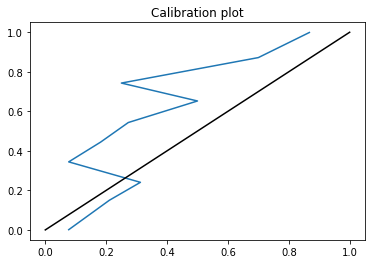

In [839]:
# bnn.model.l1.W_mu_DO.detach().numpy()
from sklearn.calibration import calibration_curve

n_bins = 10
calibration_mc_samples = 1000

sample_pred_list = []
for s in range(calibration_mc_samples):
    sample_pred = bnn.model(torch.tensor(X_train, dtype=torch.float), predict=True).detach().numpy()
    sample_pred_list.append(sample_pred)
    
# Each row is a sample, columns are datapoints; average across columns for probability
sample_preds = np.vstack(sample_pred_list).T
y_prob = np.mean(sample_preds, axis=1)
print(y_prob.shape, y_train.shape)
prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=n_bins)

plt.plot(prob_true, prob_pred)
plt.plot([i/10 for i in range(0, 11)], [i /10 for i in range(0, 11)], c='black')
plt.title('Calibration plot')
plt.show()

In [850]:
preds = bnn.model(torch.tensor(X_test, dtype=torch.float), predict=True).detach().numpy()
fbeta_score(y_test, preds, 5)

0.9256256609094113

constant at 0.003 for classificaiton

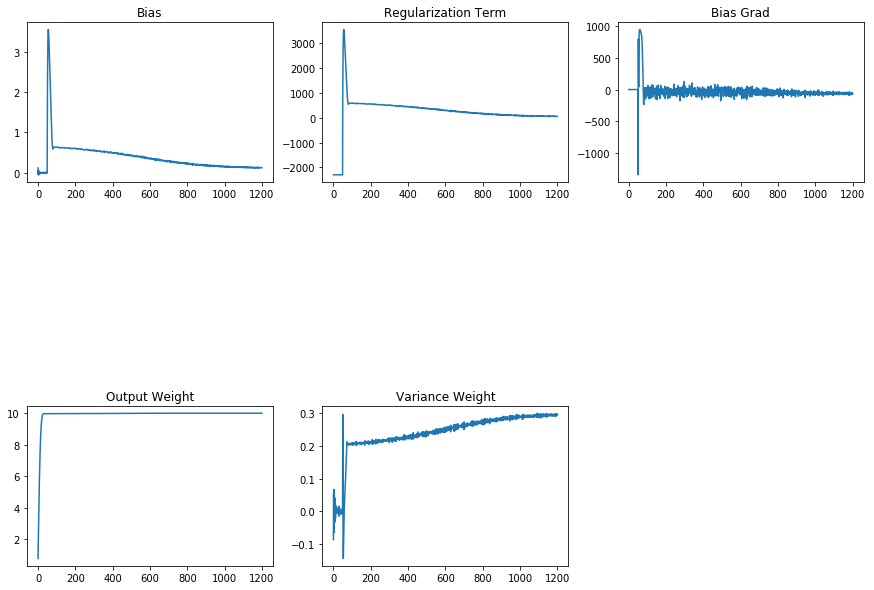

In [749]:
df = pd.read_csv("learned_variances_log.csv")
df

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(331)
ax.set_title('Bias')
ax.plot(df['b_2'])
ax = fig.add_subplot(332)
ax.set_title('Regularization Term')
ax.plot(df['reg'])
ax = fig.add_subplot(333)
ax.set_title('Bias Grad')
ax.plot(df['b_2_grad'])
ax = fig.add_subplot(337)
ax.set_title('Output Weight')
ax.plot(df['w1_2'])
ax = fig.add_subplot(338)
ax.set_title('Variance Weight')
ax.plot(df['w2_2'])
# plt.savefig(".png")


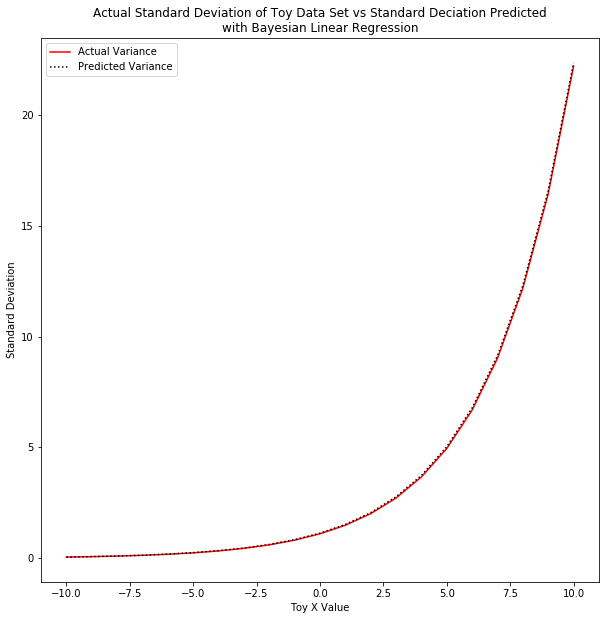

In [738]:
# W_s = np.array([0.0, 0.3]).reshape(-1, 1)
# print(W_s)
# b_s = 0.1

weights = bnn.model.l1.W_mu_DO.detach().numpy()
biases = bnn.model.l1.b_mu_O.detach().numpy()
variance_weight = weights[1][1]
bias = biases[1]
# sample_pred = bnn.model.forward(X_sample
                                

# predictions = bnn.model.forward(torch.Tensor(X_train))
# std_pred = torch.exp(predictions[:,1]).detach().numpy()

real_std = []
pred_std = []
for x in range(-10, 11):
    real_std.append(np.exp(0.3 * x + 0.1))
    pred_std.append(np.exp(variance_weight * x + bias ))
# print(real_std)
# fig, ax = plt.subplots(111, figsize=(10, 10))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title('Actual Standard Deviation of Toy Data Set vs Standard Deciation Predicted\nwith Bayesian Linear Regression')
ax.plot(list(range(-10, 11)), real_std, label='Actual Variance', c='red')
ax.plot(list(range(-10, 11)), pred_std, linestyle='dotted', label='Predicted Variance', c='black')
ax.legend()
ax.set_ylabel("Standard Deviation")
ax.set_xlabel("Toy X Value")
# plt.savefig(".png")
fig.show()
# plt.plot(list(range(-10,11)), real_std, c='C3', label='real')
# plt.plot(std_pred, label='predicted')
# plt.title("Standard Deviation versus X value")

# plt.savefig("learned_variances.png")
# plt.xlim(right = 5

(5000,) (5000,)


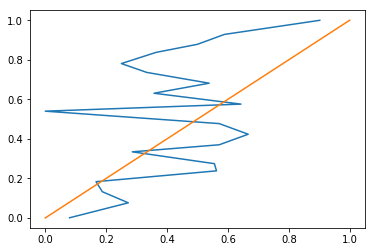

In [572]:
from sklearn.calibration import calibration_curve

n_bins = 20
calibration_mc_samples = 1000

sample_pred_list = []
for s in range(calibration_mc_samples):
    sample_pred = bnn.model(torch.tensor(X_train, dtype=torch.float), predict=True).detach().numpy()
    sample_pred_list.append(sample_pred)
    
# Each row is a sample, columns are datapoints; average across columns for probability
sample_preds = np.vstack(sample_pred_list).T
y_prob = np.mean(sample_preds, axis=1)
print(y_prob.shape, y_train.shape)
prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=n_bins)

plt.plot(prob_true, prob_pred)
plt.plot([i/10 for i in range(0, 11)], [i /10 for i in range(0, 11)], c='black')
plt.title('Calibration plot')
plt.show()

torch.Size([150, 2])


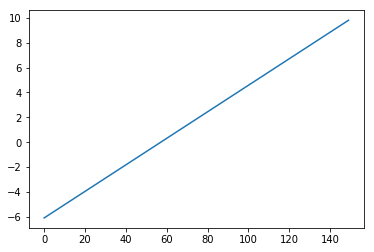

In [127]:
#X_sample = np.vstack([np.zeros(21), np.array(list(range(-10,11)))]).T

X_sample = np.arange(-5, 10, .1)
X_sample = torch.tensor(
                    np.vstack([np.zeros(len(X_sample)), X_sample]).T,
                    dtype=torch.float32)

print(X_sample.shape)


sample_pred = bnn.model.forward(X_sample).detach().numpy()


plt.plot(list(range(len(X_sample))),
         sample_pred[:,1])
plt.show()

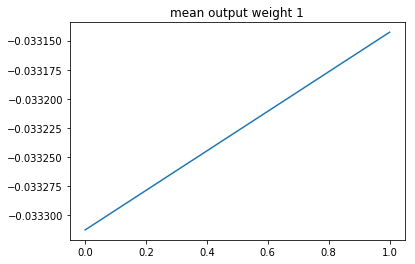

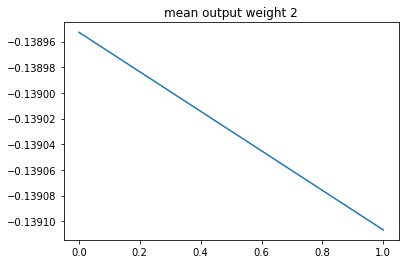

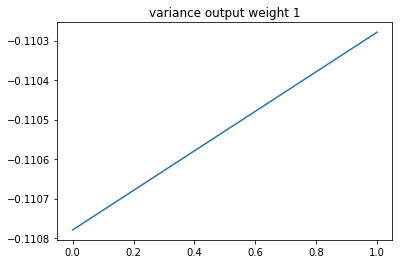

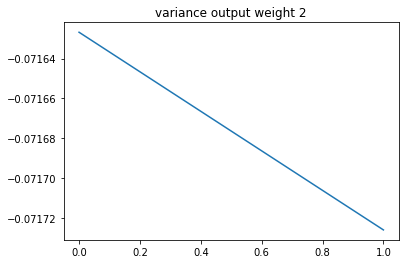

In [23]:
from graph_utils import *

df = pd.read_csv("1575743846.csv")


"""
w1_1,w1_2,w2_1,w2_2,
w1_1_grad,w1_2_grad,w2_1_grad,w2_2_grad,
b_1,b_2,
b_1_grad,b_2_grad
"""

graphCols(df, cols=['w1_1', 'w1_2', 'w2_1', 'w2_2'], ylabel='y', plotDim1=4, plotDim2=4)



In [ ]:
a = torch.normal(torch.tensor([0.0]*5), torch.tensor([5.0]*5))
print(a)

sig = nn.Sigmoid()
sig(a) > 0.5

bnn.likelihood_est(torch.tensor([0.0]*5), a, 0.1)

In [ ]:
for _ in range(10):
    pred1 = X_train @ W + b 
    pred2 = X_train @ W + b + np.random.normal(loc=0, scale=np.exp(X_train @ W_s + b_s))
    mae1 = np.mean(np.abs(pred1 - y_train))
    mae2 = np.mean(np.abs(pred2 - y_train))
    print("MAE 1: ", mae1, "MAE 2:", mae2)

In [ ]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

final_pred = bnn.model.forward(torch.Tensor(X_train))
print(final_pred[:5,0])


pred_std = torch.exp(final_pred[:,1])

print(pred_std)
print(X_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:sparse_cap,0], X_train[:sparse_cap,1], pred_std[:sparse_cap].detach().numpy())
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')



# 2D Plot:
ax_2d_x = fig.add_subplot(312)
ax_2d_x.scatter(X_train[:,0], pred_std.detach().numpy())
ax_2d_x.set_xlabel('X_train[:,0]')
ax_2d_x.set_ylabel('output[:,1] (Standard Deviation)')


ax_2d_y = fig.add_subplot(313)
ax_2d_y.scatter(X_train[:,1], pred_std.detach().numpy())
ax_2d_y.set_xlabel('X_train[:,1]')
ax_2d_y.set_ylabel('output[:,1] (Standard Deviation)')



In [ ]:
np.zeros(40)
X_sample = np.vstack([np.zeros(21), np.array(list(range(-10,11)))]).T
X_sample = torch.tensor(np.array(X_sample), dtype=torch.float32)


predictions = bnn.model.forward(torch.Tensor(X_train))

sample_pred = bnn.model.forward(X_sample)

y_pred = sample_pred[:,0].detach().numpy()
std_pred = torch.exp(sample_pred[:,1]).detach().numpy()
log_s_pred = sample_pred[:,1].detach().numpy()

print(std_pred)

# Sample variance to add to the y predictions
std_array = []
for scale in std_pred:
  std_array.append(np.random.normal(loc=0, scale=np.exp(scale)))
std_array = np.array((std_array))



"""
plt.scatter(X_train[:,0], y_pred + std_array, alpha=.1, label='predicted')
plt.scatter(X_train[:,0], y_train, alpha=.1, label='real')
plt.title("Y hat and Y values across X1")
plt.legend()
plt.savefig("x1_y.png")
"""


plt.show()

# For constant std dev#
#std_pred = 10 * torch.ones([y_pred.shape[0]], dtype=torch.float64)
# For constant std dev#

#plt.scatter(X_train[:,1], y_pred + std_array, alpha=.1, label='predicted')
#plt.scatter(X_sample[:,1], y_pred, alpha=.1, label='predicted')
plt.errorbar(X_sample[:,1], y_pred, yerr=(std_pred), fmt='o', label='predicted')
plt.scatter(X_train[:,1], y_train, alpha=.1, c='C1', label='real')
plt.ylabel("Y")
plt.xlabel("X")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.title("Predicted and real Y values vs X")
plt.legend()
plt.savefig("x_y1.png")
plt.show()



#stds = []
#Xs = list(range(-10, 11))
#for x in Xs:
#    stds.append(x + b_s)

#std_pred = predictions[:,1].detach().numpy()

real_std = []
for x in range(-10, 11):
    real_std.append(np.exp(np.array([0, x] @ W_s + b_s)))
print(real_std)
# plt.plot(list(range(-10,11)), list(range(0, 21)), c='C3', label='real')
plt.plot(list(range(-10,11)), real_std, c='C3', label='real')
plt.plot(X_sample[:,1], (std_pred), label='predicted')
plt.title("Standard Deviation versus X value")
plt.ylabel("standard deviation")
plt.xlabel("X")
plt.legend()
plt.savefig("std1.png")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.show()

In [ ]:
print(torch.exp(bnn.model.l1.W_log_s_DO))

In [ ]:

plt.plot([i for i in range(100)], loss_by_epoch)

In [ ]:
a = torch.tensor([3,3,3])
b = torch.tensor([5,5,3])
a == b